In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()

In [41]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X.shape , y.shape

((569, 30), (569,))

In [43]:
model_linear = SVC(kernel='linear')
model_rbf = SVC(kernel='rbf')

In [44]:
model_linear.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)

SVC()

In [45]:
y_pred_liner = model_linear.predict(X_test)
y_pred_rbf = model_rbf.predict(X_test)

In [46]:
print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred_liner))
print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))

Accuracy (Linear Kernel): 0.956140350877193
Accuracy (RBF Kernel): 0.9473684210526315


In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [56]:
X_reduced.shape

(569, 2)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [58]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [62]:
# Plot decision boundaries in 2D
import numpy as np

def plot_decision_boundary(model, X, y, accuracy):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"Linear SVM Decision Boundary (Accuracy: {accuracy:.2f})")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

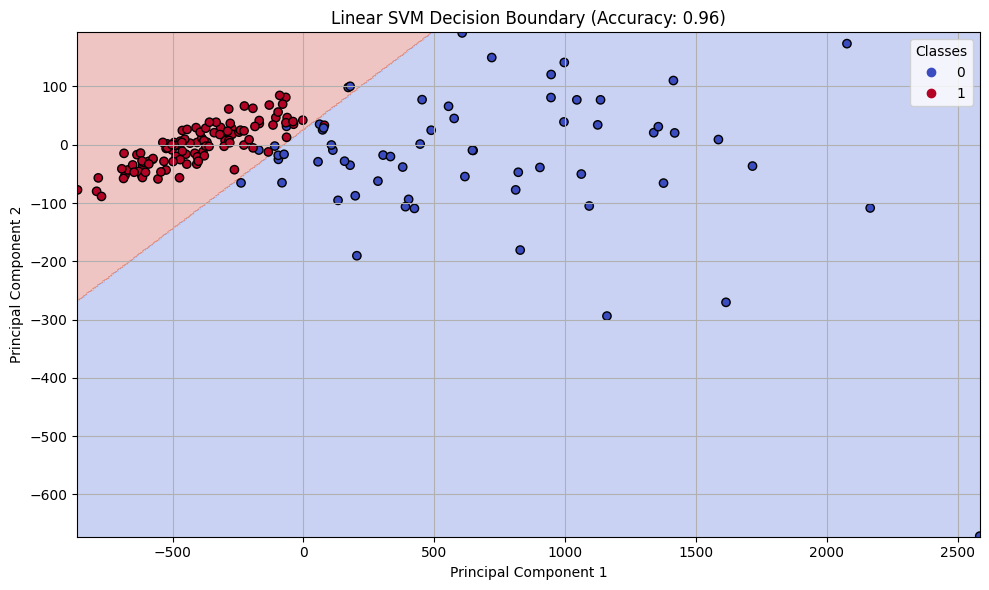

In [63]:
# Call the plot function
plot_decision_boundary(model, X_test, y_test, accuracy)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



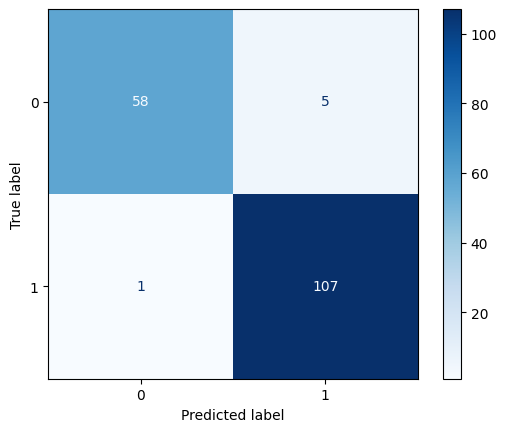

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
